In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
#reading the csv file
airbnb_data = airbnb_data = pd.read_csv('../Input_data/Input_data.csv')
#putting the csv file data in a df
airbnb_df = pd.DataFrame(airbnb_data)
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Creating a column for the minimum stay price per night
airbnb_df['min_price_to_stay'] = airbnb_df['price'] * airbnb_df['minimum_nights']
#cleaning data
airbnb_df = airbnb_df[['id', 'neighbourhood_group','neighbourhood',
 'room_type',
 'price',
 'minimum_nights',
 'min_price_to_stay',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'latitude',
 'longitude']]
#Getting only City Data
bronx_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Bronx']
bronx_df.head()

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,latitude,longitude
171,44096,Bronx,Highbridge,Private room,40,1,40,219,2.04,3,353,40.83232,-73.93184
207,54626,Bronx,Highbridge,Private room,45,1,45,138,1.45,3,323,40.83075,-73.93058
260,63588,Bronx,Clason Point,Private room,90,2,180,0,NaN,7,349,40.81309,-73.85514
261,63610,Bronx,Eastchester,Entire home/apt,105,2,210,38,0.50,13,365,40.88057,-73.83572
309,71812,Bronx,Kingsbridge,Entire home/apt,90,30,2700,4,0.35,2,346,40.87207,-73.90193


In [4]:
# see how many records there are prior to cleaning/outlier removal
len(bronx_df)

1091

In [5]:
bronx_df.count()

id                                1091
neighbourhood_group               1091
neighbourhood                     1091
room_type                         1091
price                             1091
minimum_nights                    1091
min_price_to_stay                 1091
number_of_reviews                 1091
reviews_per_month                  876
calculated_host_listings_count    1091
availability_365                  1091
latitude                          1091
longitude                         1091
dtype: int64

In [6]:
# Number of records in the data
bronx_df['reviews_per_month'].fillna(0, inplace=True)
bronx_df.count()

id                                1091
neighbourhood_group               1091
neighbourhood                     1091
room_type                         1091
price                             1091
minimum_nights                    1091
min_price_to_stay                 1091
number_of_reviews                 1091
reviews_per_month                 1091
calculated_host_listings_count    1091
availability_365                  1091
latitude                          1091
longitude                         1091
dtype: int64

In [7]:
min_nights_bronx_quartiles = bronx_df['minimum_nights'].quantile([.25,.5,.75])
min_nights_lowerq = min_nights_bronx_quartiles[.25]
min_nights_upperq = min_nights_bronx_quartiles[.75]
min_nights_iqr = (min_nights_upperq-min_nights_lowerq).round(2)
min_nights_low_b = (min_nights_lowerq - (1.5*min_nights_iqr)).round(2)
print(f'lower bound is {min_nights_low_b}')
min_nights_up_b = (min_nights_upperq + (1.5*min_nights_iqr)).round(2)
print(f'upper bound is {min_nights_up_b}')

price_bronx_quartiles = bronx_df['price'].quantile([.25,.5,.75])
price_lowerq = price_bronx_quartiles[.25]
price_upperq = price_bronx_quartiles[.75]
price_iqr = (price_upperq-price_lowerq).round(2)
price_low_b = (price_lowerq - (1.5*price_iqr)).round(2)
print(f'lower bound is {price_low_b}')
price_up_b = (price_upperq + (1.5*price_iqr)).round(2)
print(f'upper bound is {price_up_b}')

lower bound is -2.0
upper bound is 6.0
lower bound is -36.0
upper bound is 180.0


In [8]:
bronx_cleaned_df = bronx_df.loc[(bronx_df['price'] <= 180) 
                                                   & (bronx_df['minimum_nights'] <= 6) 
                                                   & (bronx_df['number_of_reviews'] > 0)]
bronx_cleaned_df.head()

,id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,latitude,longitude
171,44096,Bronx,Highbridge,Private room,40,1,40,219,2.04,3,353,40.83232,-73.93184
207,54626,Bronx,Highbridge,Private room,45,1,45,138,1.45,3,323,40.83075,-73.93058
261,63610,Bronx,Eastchester,Entire home/apt,105,2,210,38,0.50,13,365,40.88057,-73.83572
433,149777,Bronx,Woodlawn,Entire home/apt,77,1,77,197,2.49,1,309,40.89747,-73.86390
484,169306,Bronx,University Heights,Private room,37,4,148,117,1.21,1,232,40.85811,-73.90675


In [9]:
len(bronx_cleaned_df)

781

In [10]:
#Creating Bins for prices
price_bins = [0,49.9,99.9,149.9,180.9]
price_bin_names = ['0-49','50-99','100-149','150-180'] #used quartiles to cut out anything higher than 180
bronx_room_info = bronx_cleaned_df.loc[:,['neighbourhood', 'room_type', 'number_of_reviews', 'minimum_nights',
                                          'price', 'min_price_to_stay']]
bronx_room_info['price range'] = pd.cut(bronx_room_info['price'],price_bins,labels=price_bin_names)

bronx_neighbourhoods = bronx_room_info.groupby(['neighbourhood', 'room_type', 'price range']).agg(
    ['count', 'mean', 'min', 'max'])
bronx_neighbourhoods = bronx_neighbourhoods.sort_values(by=('number_of_reviews', 'count'), ascending=False)
bronx_neighbourhoods.sort_values(by=('number_of_reviews', 'count'), ascending=False).head(20)

number_of_reviews             \
                                                          count       mean   
neighbourhood     room_type       price range                                
Longwood          Private room    50-99                      22  34.863636   
Kingsbridge       Private room    50-99                      22  24.909091   
Mott Haven        Private room    50-99                      20  65.050000   
                  Entire home/apt 100-149                    18  44.944444   
Fordham           Private room    50-99                      17  40.176471   
                                  0-49                       16   6.562500   
Port Morris       Shared room     0-49                       14   9.357143   
Parkchester       Private room    0-49                       14  26.714286   
Wakefield         Private room    50-99                      14  40.500000   
Concourse         Private room    0-49                       12  18.416667   
Allerton          Private room    0-49                       11  67.909091   
Highbridge        Private room    50-99                      11  46.636364   
Kingsbridge       Private room    0-49                       10  39.300000   
Wakefield         Private room    0-49                       10  26.000000   
Concourse         Private room    50-99                      10  54.400000   
Pelham Gardens    Entire home/apt 50-99                      10  40.300000   
Norwood           Private room    50-99                      10  32.400000   
Concourse Village Private room    50-99                       9  39.000000   
Throgs Neck       Private room    50-99                       9  10.888889   
Williamsbridge    Entire home/apt 50-99                       9  67.222222   

                                                          minimum_nights  \
                                               min    max          count   
neighbourhood     room_type       price range                              
Longwood          Private room    50-99        1.0  182.0             22   
Kingsbridge       Private room    50-99        1.0  115.0             22   
Mott Haven        Private room    50-99        1.0  321.0             20   
                  Entire home/apt 100-149      1.0  170.0             18   
Fordham           Private room    50-99        1.0  101.0             17   
                                  0-49         1.0   24.0             16   
Port Morris       Shared room     0-49         1.0   29.0             14   
Parkchester       Private room    0-49         1.0   74.0             14   
Wakefield         Private room    50-99        1.0  156.0             14   
Concourse         Private room    0-49         1.0   43.0             12   
Allerton          Private room    0-49         1.0  187.0             11   
Highbridge        Private room    50-99        1.0  127.0             11   
Kingsbridge       Private room    0-49         8.0  108.0             10   
Wakefield         Private room    0-49         4.0  151.0             10   
Concourse         Private room    50-99        2.0  235.0             10   
Pelham Gardens    Entire home/apt 50-99        1.0   92.0             10   
Norwood           Private room    50-99        1.0  109.0             10   
Concourse Village Private room    50-99        1.0  258.0              9   
Throgs Neck       Private room    50-99        1.0   23.0              9   
Williamsbridge    Entire home/apt 50-99        2.0  205.0              9   

                                                                  price  \
                                                   mean  min  max count   
neighbourhood     room_type       price range                             
Longwood          Private room    50-99        2.090909  1.0  5.0    22   
Kingsbridge       Private room    50-99        2.227273  1.0  5.0    22   
Mott Haven        Private room    50-99        1.400000  1.0  3.0    20   
                  Entire home/apt 100-149      2.444

In [11]:
# order the neighbourhood by number of listings
bronx_neighbourhoods_by_popularity = []

for row in bronx_neighbourhoods.head(25).index:
    if row[0] not in bronx_neighbourhoods_by_popularity:
        bronx_neighbourhoods_by_popularity.append(row[0])

bronx_neighbourhoods_listing_count = []


for n in bronx_neighbourhoods_by_popularity:
    count = len(bronx_df.loc[bronx_df['neighbourhood'] == n])
    bronx_neighbourhoods_listing_count.append(count)

listing_count_by_neighbourhoods_df = pd.DataFrame({
    'neighbourhood': bronx_neighbourhoods_by_popularity,
    'count': bronx_neighbourhoods_listing_count
})

listing_count_by_neighbourhoods_df = listing_count_by_neighbourhoods_df.sort_values(by='count', ascending=False)
listing_count_by_neighbourhoods_df

,neighbourhood,count
1,Kingsbridge,70
3,Fordham,63
0,Longwood,62
2,Mott Haven,60
6,Wakefield,50
7,Concourse,50
4,Port Morris,46
8,Allerton,42
13,Williamsbridge,40
5,Parkchester,39


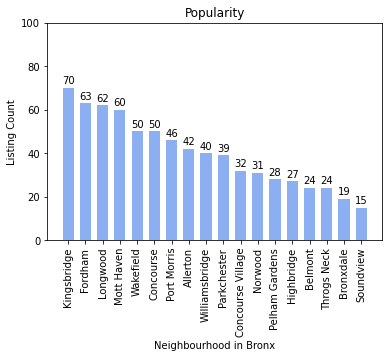

In [12]:
fig, ax = plt.subplots()

x_axis = np.arange(len(bronx_neighbourhoods_by_popularity))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, listing_count_by_neighbourhoods_df['neighbourhood'], rotation=90)

y_axis = listing_count_by_neighbourhoods_df['count']


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Listing Count')
ax.set_title('Popularity')
ax.set_xlabel('Neighbourhood in Bronx')
ax.set_ylim(0,max(bronx_neighbourhoods_listing_count)+30)


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()

In [13]:
# take the top 25 neighbourhoods
neighbourhoods_by_price = bronx_neighbourhoods.head(25)

neighbourhoods_by_price = neighbourhoods_by_price.reset_index()

worth_per_stay = []

for i in range(len(neighbourhoods_by_price)):
    if neighbourhoods_by_price['room_type'][i] == 'Private room':
        # if it the listing is a private room, we will assume that there are two rooms available to list
        worth_per_stay.append(neighbourhoods_by_price.loc[:, ('min_price_to_stay', 'mean')][i]*2)
    else:
        worth_per_stay.append(neighbourhoods_by_price.loc[:, ('min_price_to_stay', 'mean')][i])
    
neighbourhoods_by_price['worth_per_stay'] = worth_per_stay
neighbourhoods_by_price

neighbourhood        room_type price range number_of_reviews  \
                                                               count   
0            Longwood     Private room       50-99                22   
1         Kingsbridge     Private room       50-99                22   
2          Mott Haven     Private room       50-99                20   
3          Mott Haven  Entire home/apt     100-149                18   
4             Fordham     Private room       50-99                17   
5             Fordham     Private room        0-49                16   
6         Port Morris      Shared room        0-49                14   
7         Parkchester     Private room        0-49                14   
8           Wakefield     Private room       50-99                14   
9           Concourse     Private room        0-49                12   
10           Allerton     Private room        0-49                11   
11         Highbridge     Private room       50-99                11   
12        Kingsbridge     Private room        0-49                10   
13          Wakefield     Private room        0-49                10   
14          Concourse     Private room       50-99                10   
15     Pelham Gardens  Entire home/apt       50-99                10   
16            Norwood     Private room       50-99                10   
17            Belmont     Private room        0-49                 9   
18         Mott Haven     Private room        0-49                 9   
19     Williamsbridge  Entire home/apt       50-99                 9   
20  Concourse Village     Private room       50-99                 9   
21        Throgs Neck     Private room       50-99                 9   
22        Port Morris  Entire home/apt     100-149                 8   
23          Bronxdale     Private room        0-49                 8   
24          Soundview     Private room        0-49                 8   

                          minimum_nights                     price  \
         mean  min    max          count      mean  min  max count   
0   34.863636  1.0  182.0             22  2.090909  1.0  5.0    22   
1   24.909091  1.0  115.0             22  2.227273  1.0  5.0    22   
2   65.050000  1.0  321.0             20  1.400000  1.0  3.0    20   
3   44.944444  1.0  170.0             18  2.444444  1.0  5.0    18   
4   40.176471  1.0  101.0             17  2.235294  1.0  3.0    17   
5    6.562500  1.0   24.0             16  2.187500  1.0  5.0    16   
6    9.357143  1.0   29.0             14  1.000000  1.0  1.0    14   
7   26.714286  1.0   74.0             14  1.857143  1.0  3.0    14   
8   40.500000  1.0  156.0             14  1.642857  1.0  3.0    14   
9   18.416667  1.0   43.0             12  1.750000  1.0  5.0    12   
10  67.909091  1.0  187.0             11  1.909091  1.0  3.0    11   
11  46.636364  1.0  127.0             11  2.090909  1.0  4.0    11   
12  39.300000  8.0  108.0             10  2.300000  1.0  4.0    10   
13  26.000000  4.0  151.0             10  1.200000  1.0  2.0    10   
14  54.400000  2.0  235.0             10  1.800000  1.0  5.0    10   
15  40.300000  1.0   92.0             10  2.000000  1.0  3.0    10   
16  32.400000  1.0  109.0             10  2.800000  1.0  6.0    10   
17   8.222222  3.0   28.0              9  2.444444  1.0  4.0     9   
18  26.888889  7.0   73.0              9  3.222222  1.0  5.0     9   
19  67.222222  2.0  205.0              9  2.444444  1.0  5.0     9   
20  39.000000  1.0  258.0              9  1.777778  1.0  3.0     9   
21  10.888889  1.0   23.0              9  1.444444  1.0  3.0     9   
22  23.125000  7.0   89.0              8  2.875000  1.0  5.0     8   
23  43.125000  1.0  114.0              8  2.750000  1.0  5.0     8   
24  28.625000  6.0   98.0              8  2.000000  1.0  3.0     8   

                             min_price_to_stay                            \
          mean    min    max             count        mean    min    max   
0    66.590909   50.

In [14]:
# Create a list of the neighbourhoods in the top 25 listings
bronx_neighbourhoods_by_worth = []

for neighbourhoods in neighbourhoods_by_price['neighbourhood']:
    if neighbourhoods not in bronx_neighbourhoods_by_worth:
        bronx_neighbourhoods_by_worth.append(neighbourhoods)
        
bronx_neighbourhoods_by_worth;

# Put together a measure of total profitability for each neighbourhood
    
bronx_neighbourhoods_worth_per_stay = []

for neighbourhoods in bronx_neighbourhoods_by_worth:
    price = sum(neighbourhoods_by_price.loc[neighbourhoods_by_price['neighbourhood'] == neighbourhoods,
                                            'worth_per_stay'])
    bronx_neighbourhoods_worth_per_stay.append(price)

bronx_neighbourhoods_worth_per_stay

worth_per_stay_by_neighbourhoods_df = pd.DataFrame({
    'neighbourhood': bronx_neighbourhoods_by_worth,
    'Worth per Stay': bronx_neighbourhoods_worth_per_stay
})

worth_per_stay_by_neighbourhoods_df = worth_per_stay_by_neighbourhoods_df.sort_values(by='Worth per Stay', 
                                                                                      ascending=False)
worth_per_stay_by_neighbourhoods_df


,neighbourhood,Worth per Stay
2,Mott Haven,733.433333
3,Fordham,472.250000
1,Kingsbridge,466.000000
7,Concourse,366.833333
4,Port Morris,361.875000
11,Norwood,325.800000
6,Wakefield,284.057143
9,Highbridge,277.272727
0,Longwood,275.909091
14,Concourse Village,243.111111


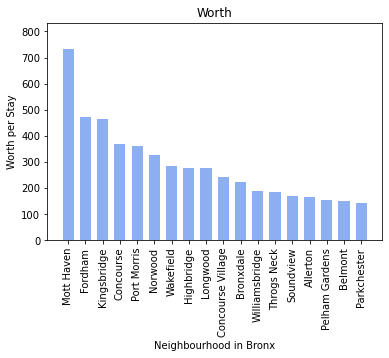

In [15]:
fig, ax = plt.subplots()

x_axis = np.arange(len(bronx_neighbourhoods_by_worth))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, worth_per_stay_by_neighbourhoods_df['neighbourhood'], rotation=90)

y_axis = round(worth_per_stay_by_neighbourhoods_df['Worth per Stay'], 2)


rects1 = ax.bar(x_axis, y_axis, color="cornflowerblue", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Worth per Stay')
ax.set_title('Worth')
ax.set_xlabel('Neighbourhood in Bronx')
ax.set_ylim(0,max(bronx_neighbourhoods_worth_per_stay)+100)


#def autolabel(rects):
     # Attach a text label above each bar in *rects*, displaying its height.
   # for rect in rects:
      #  height = rect.get_height()
       # ax.annotate('{}'.format(height),
        #            xy=(rect.get_x() + rect.get_width() / 2, height),
        #            xytext=(0, 2),  
          #          textcoords="offset points",
          #          ha='center', va='bottom')


#autolabel(rects1)

plt.show()

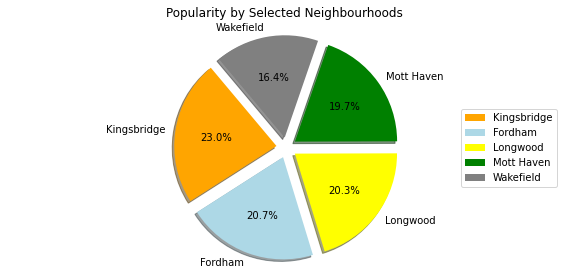

In [16]:
pie_chart_df = listing_count_by_neighbourhoods_df.reset_index(drop=True)

pie_chart_df

# We are going to look at the top five neighbourhoods by listing only
pie_chart_df = pie_chart_df.loc[0:4, :]

fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

neigh_list = pie_chart_df['neighbourhood']
length = len(pie_chart_df['neighbourhood'])

x_axis = np.arange(length)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, neigh_list, rotation=90)

y_axis = pie_chart_df['count']

explode = (0.1,0.1,0.1,0.1,0.1)
colors = ["orange","lightblue", "yellow", "green", "grey"]

ax.pie(y_axis, explode=explode, labels=neigh_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

ax.set_title("Bronx Popularity by Selected Neighbourhoods")
ax.legend(loc="center right")

plt.axis("equal")

fig.tight_layout()
plt.show()

In [17]:
profitability_df = worth_per_stay_by_neighbourhoods_df.reset_index(drop=True)

profitability_df = profitability_df.loc[0:4, :]

profitability = []

for i in range(len(profitability_df['Worth per Stay'])):
    profitability.append(profitability_df['Worth per Stay'][i] * (pie_chart_df['count'][i] / sum(pie_chart_df['count'])))

profitability_df['Listings'] = pie_chart_df['count']
profitability_df['Profitability'] = profitability

profitability_df = profitability_df.sort_values(by='Profitability', ascending=False)

profitability_df

,neighbourhood,Worth per Stay,Listings,Profitability
0,Mott Haven,733.433333,70,168.328962
1,Fordham,472.250000,63,97.546721
2,Kingsbridge,466.000000,62,94.727869
3,Concourse,366.833333,60,72.163934
4,Port Morris,361.875000,50,59.323770


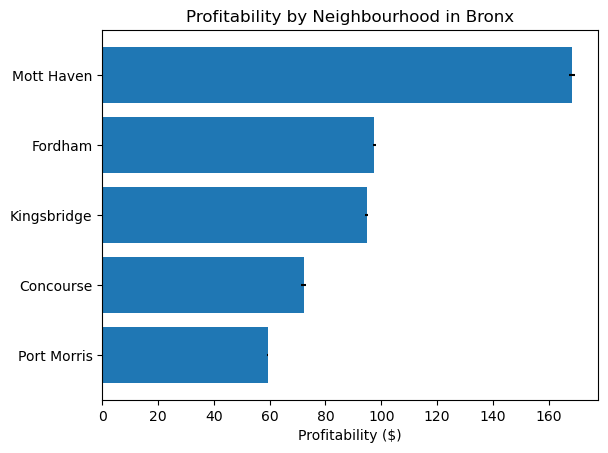

In [18]:
y_axis = profitability_df['neighbourhood'].values
x_axis = profitability_df['Profitability'].values


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(y_axis))
error = np.random.rand(len(y_axis))

ax.barh(y_pos, x_axis, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Profitability ($)')
ax.set_title('Profitability by Neighbourhood in Bronx')

plt.show()
